# Main File

## Import Packages

In [1]:
import pandas as pd
from data_preprocessing_funcs import *
from modelling_funcs import *
from ESGBERT import *
import swifter
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Text Files / Reports

### Import and preprocess SGX / SNP Files and saving it to pickle files (Dataframe with tokens)

#### SGX

In [4]:
sgx = preprocess_sgx_files()
sgx.to_pickle('sgx.pkl')

Extracting & Preprocessing SGX Sustainability Reports...


100%|██████████| 1318/1318 [01:01<00:00, 21.54it/s]


Done...!


#### SNP

In [ ]:
snp = preprocess_snp_files()
snp.to_pickle('snp.pkl')

Extracting & Preprocessing SNP500 Annual / Quarterly Reports...


100%|██████████| 18296/18296 [56:43<00:00,  5.38it/s]  


Done...!


## Objective 1: Modelling Quantitative Trends

### Bag Of Words Model

#### SGX

In [2]:
# Modelling quantitative Trends
sgx = pd.read_pickle('sgx.pkl')
sgx_quant = model_tokens_BOW(sgx)
sgx_quant.to_pickle('sgx_quant.pkl')

100%|██████████| 1318/1318 [00:22<00:00, 59.91it/s]


#### SNP

In [ ]:
snp = pd.read_pickle('snp.pkl')
snp_quant = model_tokens_BOW(snp)
snp_quant.to_pickle('snp_quant.pkl')

 49%|████▉     | 9049/18296 [23:21<23:03,  6.68it/s]

#### SGX Ann

In [3]:
sgx_ann = pd.read_pickle('sgx_ann.pkl')
sgx_ann_quant = model_tokens_BOW(sgx_ann)
sgx_ann_quant.to_pickle('sgx_ann_quant.pkl')

100%|██████████| 181/181 [00:01<00:00, 111.13it/s]


### Extract Trends

#### SGX

In [4]:
sgx_quant = pd.read_pickle('sgx_quant.pkl')
sgx_quant_processed = extract_companies_with_trend(sgx_quant)
sgx_quant_processed.to_excel('sgx_quant_results.xlsx')

#### SNP

In [ ]:
snp_quant = pd.read_pickle('snp_quant.pkl')
snp_quant_results = extract_companies_with_trend(snp_quant)
snp_quant_results.to_excel('snp_quant_results.xlsx')

#### SGX ANN

In [3]:
sgx_ann_quant = pd.read_pickle('sgx_ann_quant.pkl')
sgx_ann_quant_processed = extract_companies_with_trend(sgx_ann_quant)
sgx_ann_quant_processed.to_excel('sgx_ann_quant_results.xlsx')

### Scrape Company Descriptions

In [3]:
sgx_quant = pd.read_excel('sgx_quant_results.xlsx')
sgx_quant_desc = scrape_company_descrptions(sgx_quant, 'sg')
sgx_quant_desc.to_excel('sgx_quant_results_desc.xlsx')

100%|██████████| 27/27 [00:24<00:00,  1.12it/s]


In [4]:
sgx_ann_quant = pd.read_excel('sgx_ann_quant_results.xlsx')
sgx_ann_quant_desc = scrape_company_descrptions(sgx_ann_quant, 'sg')
sgx_ann_quant_desc.to_excel('sgx_ann_quant_results_desc.xlsx')

100%|██████████| 23/23 [00:21<00:00,  1.08it/s]


In [5]:
snp_quant_results = pd.read_excel('snp_quant_results.xlsx')
snp_quant_results_desc = scrape_company_descrptions(snp_quant_results, 'us')
snp_quant_results_desc.to_excel('snp_quant_results_desc.xlsx')

100%|██████████| 491/491 [19:06<00:00,  2.33s/it]


### Normalize Trend Strength within markets

In [2]:
sgx_quant_results = pd.read_excel('sgx_quant_results_desc.xlsx')
sgx_quant_results['E_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['E_Strength'])
sgx_quant_results['S_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['S_Strength'])
sgx_quant_results['G_Strength_Normalized'] = normalize_trend_strength(sgx_quant_results['G_Strength'])

sgx_ann_quant_results = pd.read_excel('sgx_ann_quant_results_desc.xlsx')
sgx_ann_quant_results['E_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['E_Strength'])
sgx_ann_quant_results['S_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['S_Strength'])
sgx_ann_quant_results['G_Strength_Normalized'] = normalize_trend_strength(sgx_ann_quant_results['G_Strength'])

snp_quant_results = pd.read_excel('snp_quant_results_desc.xlsx')
snp_quant_results['E_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['E_Strength'])
snp_quant_results['S_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['S_Strength'])
snp_quant_results['G_Strength_Normalized'] = normalize_trend_strength(snp_quant_results['G_Strength'])

### Merge datasets into one results file

In [3]:
sgx_quant_results['Market'] = 'Singapore'
sgx_quant_results['Data Source'] = 'Sustainability Reports'

sgx_ann_quant_results['Market'] = 'Singapore'
sgx_ann_quant_results['Data Source'] = 'Annual Reports'

snp_quant_results['Market'] = 'US'
snp_quant_results['Data Source'] = '10-K / 10-Q'

total_df = pd.concat([sgx_quant_results, sgx_ann_quant_results, snp_quant_results])
total_df.to_excel('total_results.xlsx')

## Objective 2: Qualitative Exploration of Trends

#### 3 Companies Identified:
1. Singapore Airlines Ltd. (SGX)
2. Wilmar International Ltd. (SGX)
3. Applied Materials (SNP)

#### Extract Companies

In [2]:
df = pd.read_excel('total_results.xlsx')

In [3]:
# Singapore Airlines Ltd.
sia = pd.concat([df[df['Company Name'] == 'SINGAPORE AIRLINES LIMITED'].copy(),
                 df[df['Company Name'] == 'SINGAPORE AIRLINES LTD'].copy()])
# Wilmar International Ltd.
wilmar = df[df['Company Name'] == 'WILMAR INTERNATIONAL LIMITED'].copy()
# Applied Materials
applied_mat = df[df['Company Name'] == 'Applied Materials'].copy()

In [13]:
sia

,Unnamed: 0.1,Unnamed: 0,Ticker,Quarter,Tokens,Company Name,File Name,Date,Environmental,Governance,...,G %,E_Trend,E_Strength,S_Trend,S_Strength,G_Trend,G_Strength,Market,Data Source,FileName
133,133,133,C6L,2017Q1,"['sustainability', 'report', 'fy', 'overview',...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2017-03).txt,2017-03,414,641,...,4.032207,True,8,False,-2,True,-8,SGX,Sustainability Reports,NaN
134,134,134,C6L,2018Q1,"['singapore', 'airline', 'sustainability', 're...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2018-03).txt,2018-03,564,773,...,4.183353,True,8,False,-2,True,-8,SGX,Sustainability Reports,NaN
135,135,135,C6L,2019Q1,"['singapore', 'airline', 'historical', 'timeli...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2019-03).txt,2019-03,751,902,...,3.762880,True,8,False,-2,True,-8,SGX,Sustainability Reports,NaN
136,136,136,C6L,2020Q1,"['singapore', 'airline', 'sustainability', 're...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2020-03).txt,2020-03,1538,1045,...,2.889454,True,8,False,-2,True,-8,SGX,Sustainability Reports,NaN
137,137,137,C6L,2021Q1,"['content', 'introduction', 'sustainability', ...",SINGAPORE AIRLINES LIMITED,SINGAPORE AIRLINES LIMITED (2021-03).txt,2021-03,1679,1046,...,2.503830,True,8,False,-2,True,-8,SGX,Sustainability Reports,NaN
259,105,105,C6L,2015Q1,"['annual', 'report', 'fy', 'path', 'progress',...",SINGAPORE AIRLINES LTD,NaN,2015-01-01 00:00:00,101,1257,...,2.777594,True,20,True,16,True,18,SGX,Annual Reports,SIA 2015.pdf
260,106,106,C6L,2016Q1,"['strengthening', 'position', 'leadership', 'a...",SINGAPORE AIRLINES LTD,NaN,2016-01-01 00:00:00,93,1407,...,2.915941,True,20,True,16,True,18,SGX,Annual Reports,SIA 2016.pdf
261,107,107,C6L,2017Q1,"['annual', 'report', 'fy', 'singapore', 'airli...",SINGAPORE AIRLINES LTD,NaN,2017-01-01 00:00:00,106,1432,...,2.924299,True,20,True,16,True,18,SGX,Annual Reports,SIA 2017.pdf
262,108,108,C6L,2018Q1,"['annual', 'report', 'fy', 'embarking', 'trans...",SINGAPORE AIRLINES LTD,NaN,2018-01-01 00:00:00,128,1526,...,3.181288,True,20,True,16,True,18,SGX,Annual Reports,SIA 2018.pdf
263,109,109,C6L,2019Q1,"['annual', 'report', 'fy', 'mission', 'stateme...",SINGAPORE AIRLINES LTD,NaN,2019-01-01 00:00:00,131,1829,...,3.397734,True,20,True,16,True,18,SGX,Annual Reports,SIA 2019.pdf


In [7]:
wilmar

NameError: name 'wilmar' is not defined

In [16]:
applied_mat

,Unnamed: 0.1,Unnamed: 0,Ticker,Quarter,Tokens,Company Name,File Name,Date,Environmental,Governance,...,G %,E_Trend,E_Strength,S_Trend,S_Strength,G_Trend,G_Strength,Market,Data Source,FileName
1344,1016,1016,AMAT,2010Q2,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2010-05-02.txt,2010-05-02,119,294,...,1.641816,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1345,1017,1017,AMAT,2010Q3,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2010-08-01.txt,2010-08-01,143,301,...,1.630111,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1346,1018,1018,AMAT,2010Q4,"['k', 'fevk', 'htm', 'form', 'k', 'evk', 'tabl...",Applied Materials,AMAT 2010-10-31.txt,2010-10-31,219,620,...,1.842880,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1347,1019,1019,AMAT,2011Q1,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-01-30.txt,2011-01-30,97,276,...,1.657359,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1348,1020,1020,AMAT,2011Q2,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-05-01.txt,2011-05-01,110,333,...,1.671855,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1349,1021,1021,AMAT,2011Q3,"['q', 'fevq', 'htm', 'form', 'q', 'evq', 'tabl...",Applied Materials,AMAT 2011-07-31.txt,2011-07-31,117,357,...,1.702107,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1350,1022,1022,AMAT,2011Q4,"['k', 'ddk', 'htm', 'form', 'k', 'form', 'k', ...",Applied Materials,AMAT 2011-10-30.txt,2011-10-30,241,689,...,1.883646,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1351,1023,1023,AMAT,2012Q1,"['q', 'ddq', 'htm', 'form', 'q', 'form', 'q', ...",Applied Materials,AMAT 2012-01-29.txt,2012-01-29,114,383,...,1.999687,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1352,1024,1024,AMAT,2012Q2,"['q', 'amat', 'xqxdoc', 'htm', 'form', 'q', 'a...",Applied Materials,AMAT 2012-04-29.txt,2012-04-29,138,400,...,1.913052,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN
1353,1025,1025,AMAT,2012Q3,"['q', 'amat', 'xqxdoc', 'htm', 'form', 'q', 'a...",Applied Materials,AMAT 2012-07-29.txt,2012-07-29,141,406,...,1.913740,True,-793,True,887,True,659,SNP,10-K / 10-Q,NaN


### Join tokens to form sentences to pass into ESGBERT

In [4]:
sia['Tokens'] = sia['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))
wilmar['Tokens'] = wilmar['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))
applied_mat['Tokens'] = applied_mat['Tokens'].apply(lambda x: x.strip('][\'\"').replace('\'',"").split(', '))

In [14]:
sia['sentences'] = sia['Tokens'].apply(lambda x: join_sentences(x))
wilmar['sentences'] = wilmar['Tokens'].apply(lambda x: join_sentences(x))
applied_mat['sentences'] = applied_mat['Tokens'].apply(lambda x: join_sentences(x))

In [22]:
print("Running ESGBERT for SIA...")
sia_bert = ESGBERT_clf(sia)
sia_bert.to_pickle('sia_bert.pkl')
print("done...!")

print("Running ESGBERT for Wilmar...")
wilmar_bert = ESGBERT_clf(wilmar)
wilmar_bert.to_pickle('wilmar_bert.pkl')
print("done...!")

print("Running ESGBERT for Applied Materials...")
applied_mat_bert = ESGBERT_clf(applied_mat)
applied_mat_bert.to_pickle('applied_mat_bert.pkl')
print("Done...!")

KeyboardInterrupt: 

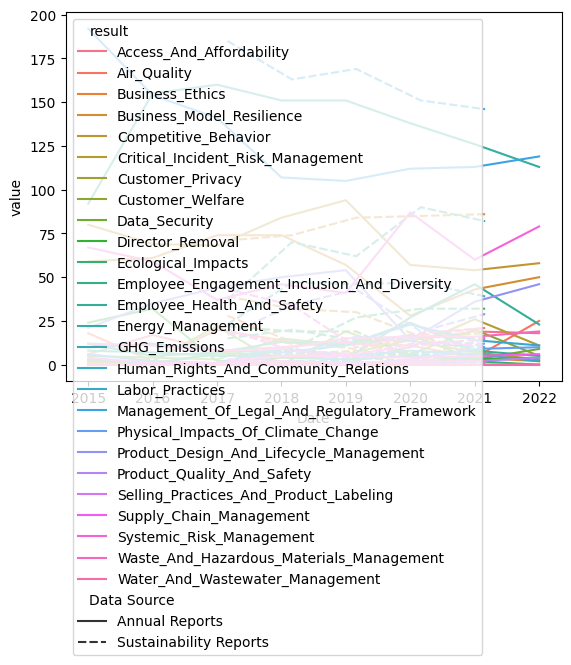

In [8]:
sia = pd.read_pickle('sia_bert.pkl')
sia_subcategories = sia[['Data Source', 'Date', 'result']].groupby(['Data Source', 'Date', 'result']).size().unstack(
    fill_value=0).reset_index().copy()
sia_subcategories_long = pd.melt(sia_subcategories, id_vars=['Data Source', 'Date'])
sns.lineplot(data=sia_subcategories_long, x='Date', y='value', hue='result', style='Data Source', legend = 'full')
plt.show()

In [6]:
sia_subcategories

result,Data Source,Date,Access_And_Affordability,Air_Quality,Business_Ethics,Business_Model_Resilience,Competitive_Behavior,Critical_Incident_Risk_Management,Customer_Privacy,Customer_Welfare,...,Labor_Practices,Management_Of_Legal_And_Regulatory_Framework,Physical_Impacts_Of_Climate_Change,Product_Design_And_Lifecycle_Management,Product_Quality_And_Safety,Selling_Practices_And_Product_Labeling,Supply_Chain_Management,Systemic_Risk_Management,Waste_And_Hazardous_Materials_Management,Water_And_Wastewater_Management
0,Annual Reports,2015-01-01,6,18,1,59,80,2,3,2,...,10,192,0,21,0,0,4,67,12,0
1,Annual Reports,2016-01-01,17,2,2,61,69,0,0,2,...,12,154,0,35,0,0,1,59,11,0
2,Annual Reports,2017-01-01,8,20,0,74,68,1,7,22,...,8,141,0,44,1,0,1,37,8,0
3,Annual Reports,2018-01-01,10,14,0,74,84,2,5,0,...,7,107,0,50,2,0,5,46,9,2
4,Annual Reports,2019-01-01,13,12,1,57,94,1,6,19,...,11,105,0,54,1,1,5,41,15,0
5,Annual Reports,2020-01-01,14,11,2,28,57,10,14,6,...,23,112,3,14,2,1,4,87,16,0
6,Annual Reports,2021-01-01,19,4,4,43,54,26,7,20,...,14,113,9,36,2,0,5,60,16,0
7,Annual Reports,2022-01-01,18,25,2,50,58,11,3,5,...,11,119,10,46,4,0,6,79,19,0
8,Sustainability Reports,2017-03-01,5,18,28,71,39,1,5,5,...,1,185,2,17,3,0,20,43,3,0
9,Sustainability Reports,2018-03-01,6,12,13,74,32,6,7,8,...,2,163,6,34,1,0,8,34,5,0
